In [1]:
list_ATAC_met=[]
with open("data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
    for lines in r2:
        list_ATAC_met+=[lines.split("\t")[-3].strip("\n")]

list_RNA_met=[]
with open("data/maize_leaf_harmony_integrated.v3.subLEIDEN.metadata.txt", "r") as r2:
    for lines in r2:
        list_RNA_met+=[lines.split("\t")[-3].strip("\n")]


NameError: name 'list_x4_label' is not defined

In [2]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

rna_embeddings = np.loadtxt('./output/exprs_10xPBMC_rna_embeddings.txt')
atac_embeddings = np.loadtxt('./output/exprs_10xPBMC_atac_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(9841, 64)
(6913, 64)
(16754, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


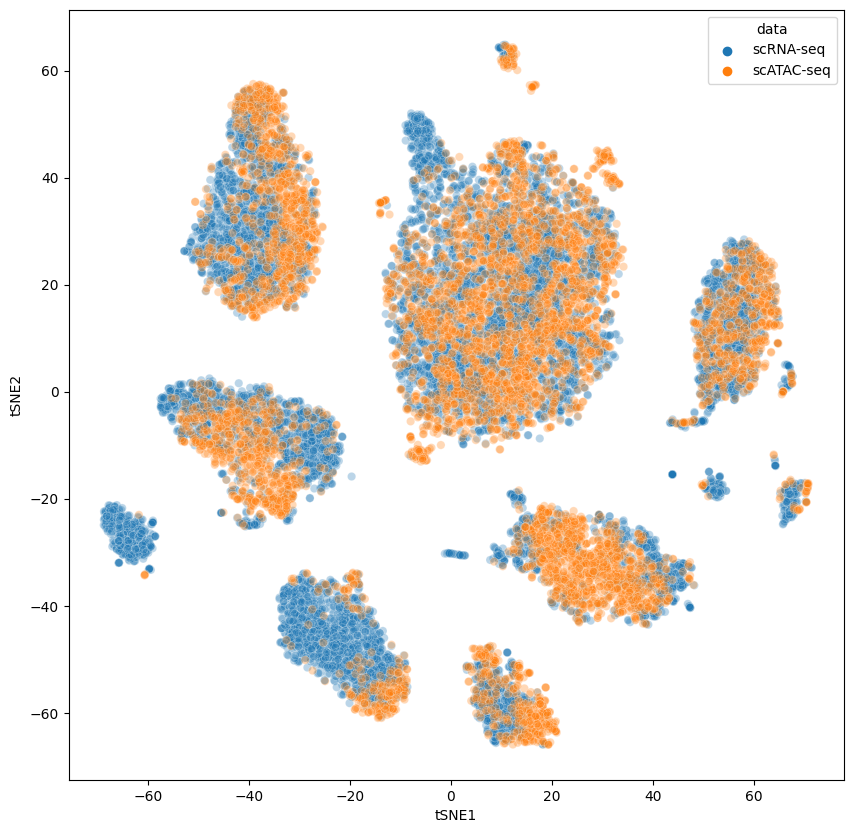

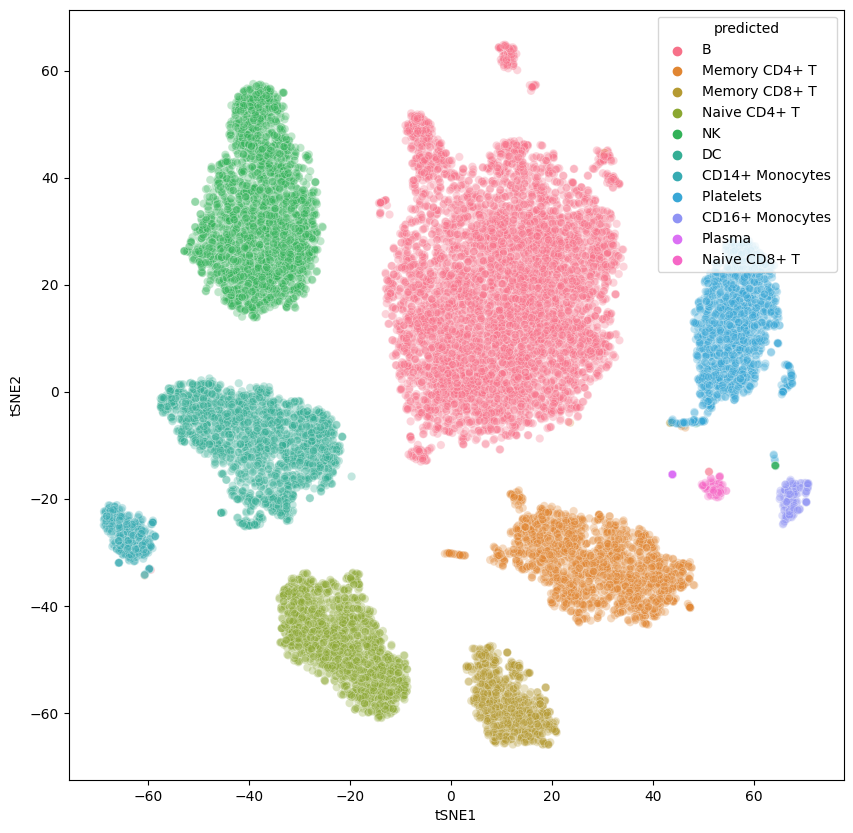

In [3]:
#print(df)
rna_labels = np.loadtxt('./data/cellType_10xPBMC_rna.txt')
atac_predictions = np.loadtxt('./output/exprs_10xPBMC_atac_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_skip_referenced_random_new_corrected_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_skip_referenced_new_corrected_1.png")

In [4]:
df_modi_ATAC = df[df.data == "scATAC-seq"]
df_modi_RNA = df[df.data == "scRNA-seq"]


In [5]:
print(df_modi_ATAC)

           tSNE1      tSNE2        data      predicted
9841  -19.991671 -56.841034  scATAC-seq   Naive CD4+ T
9842  -11.457406  20.160051  scATAC-seq              B
9843    3.924284   0.064567  scATAC-seq              B
9844   25.972576  31.591911  scATAC-seq              B
9845   -9.918218 -55.137405  scATAC-seq   Naive CD4+ T
...          ...        ...         ...            ...
16749  19.044437   3.817326  scATAC-seq              B
16750  31.681517  39.362129  scATAC-seq              B
16751 -13.996987 -58.360443  scATAC-seq   Naive CD4+ T
16752  22.316669 -33.614101  scATAC-seq  Memory CD4+ T
16753 -36.074512 -18.697956  scATAC-seq             DC

[6913 rows x 4 columns]


In [6]:
print(df_modi_RNA)

          tSNE1      tSNE2       data        predicted
0    -11.557633   9.607010  scRNA-seq                B
1     16.680326 -33.299160  scRNA-seq    Memory CD4+ T
2      6.537226  12.308099  scRNA-seq                B
3      9.349325 -63.449879  scRNA-seq    Memory CD8+ T
4     -3.044615  -0.196271  scRNA-seq                B
...         ...        ...        ...              ...
9836 -14.915849 -52.959740  scRNA-seq     Naive CD4+ T
9837 -30.239950 -47.557262  scRNA-seq     Naive CD4+ T
9838  -2.967451  16.121281  scRNA-seq                B
9839 -38.374641  -1.855615  scRNA-seq               DC
9840 -66.909836 -22.088194  scRNA-seq  CD14+ Monocytes

[9841 rows x 4 columns]
